In [12]:
import sqlalchemy as sql
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import chart_studio.plotly as plotly
import plotly.graph_objects as go
from chart_studio.plotly import plot, iplot


In [17]:
import pymysql
conn = pymysql.connect(host='localhost', port=3306, user='root', passwd = "root")
cur = conn.cursor()
cur.execute("use marveldb")
df_nodes = pd.read_sql("SELECT * FROM heroes;", conn)
df_nodes.head()

Id                    Label
0   Black Panther / T'chal   Black Panther / T'chal
1         Loki [asgardian]         Loki [asgardian]
2     Richards, Franklin B        Mantis / ? Brandt
3    Iceman / Robert Bobby    Iceman / Robert Bobby
4  Marvel Girl / Jean Grey  Marvel Girl / Jean Grey

In [20]:
df_edges = pd.read_sql("SELECT * FROM connections;", conn)
df_edges.head()

Source                   Target  Weight
0  Black Panther / T'chal         Loki [asgardian]      10
1  Black Panther / T'chal        Mantis / ? Brandt      23
2  Black Panther / T'chal    Iceman / Robert Bobby      12
3  Black Panther / T'chal  Marvel Girl / Jean Grey      10
4  Black Panther / T'chal   Cyclops / Scott Summer      14

In [26]:
# cria uma função para criar os grafos
def create_graph(df_nodes, df_edges):
    G = nx.Graph()
    #Adiciona os nós
    for i, r in df_nodes.iterrows():
        G.add_node(r["Id"])

    #Faz uma tupla com as arestas
    edges_tuple = [(r["Source"], r["Target"]) for i, r in df_edges.iterrows()]
    G.add_edges_from(edges_tuple)

    return G

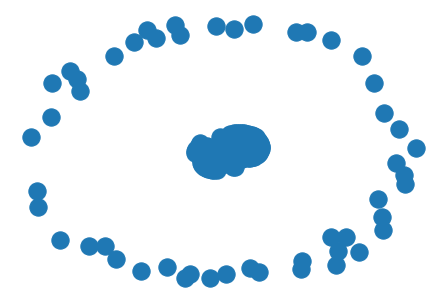

In [27]:
nx.draw(create_graph(df_nodes, df_edges))

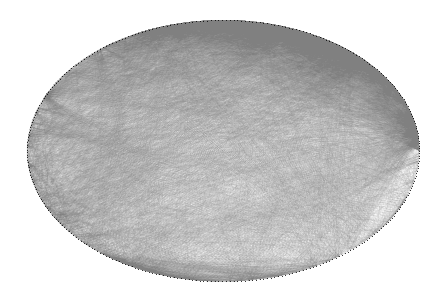

In [6]:
options = {
    "node_color": "black",
    "node_size": 1,
    "edge_color": "gray",
    "linewidths": 0,
    "width": 0.04,
}
nx.draw_circular(G, **options)

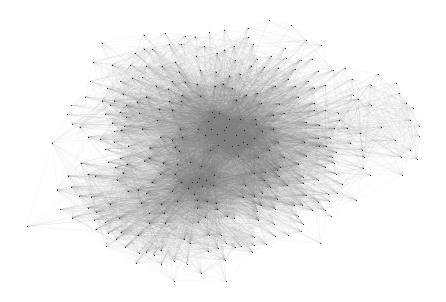

In [8]:
options = {
    "node_color": "black",
    "node_size": 1,
    "edge_color": "gray",
    "linewidths": 0,
    "width": 0.04,
}
nx.draw_kamada_kawai(G, **options)